In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("id_gender_ethnicity.tsv", sep="\t", names=['id', 'gender', 'ethnicity'])

In [3]:
df.head()

,id,gender,ethnicity
0,3211298559,1,french
1,82733984485,1,french
2,99029428429,0,czech
3,71174220620,1,swedish
4,47408331317,1,french


In [4]:
df['ethnicity'] = df['ethnicity'].astype('category')
df['gender'] = df['gender'].astype('category')

In [5]:
df['gender'].value_counts()

2    12915656
1    10064914
0     9302203
Name: gender, dtype: int64

In [6]:
df['ethnicity'].value_counts()

french        8347562
spanish       7392333
jewish        5543338
italian       1258961
muslim        1227381
indian        1221867
portugese     1035359
chinese       1021422
czech          829221
swedish        799619
german         688242
swiss          659790
irish          540181
danish         436100
greek          271806
japanese       226981
russian        204149
african        202490
ukranian       170891
korean          86824
vietnamese      51004
slavic          40243
arabic          27009
Name: ethnicity, dtype: int64

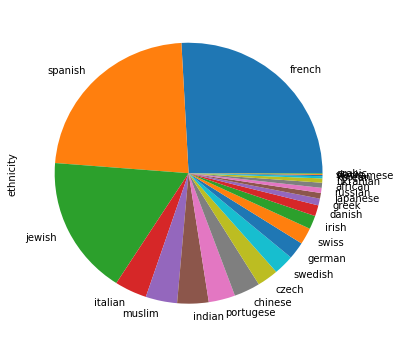

In [25]:
df['ethnicity'].value_counts().plot.pie(figsize=(6, 6))
plt.show()

In [7]:
df.groupby(['ethnicity','gender']).size()

ethnicity   gender
african     0          141803
            1           29273
            2           31414
arabic      0           12219
            1            6066
            2            8724
chinese     0          884675
            1           59566
            2           77181
czech       0          195854
            1          243166
            2          390201
danish      0           63084
            1          125698
            2          247318
french      0         1847795
            1         2967836
            2         3531931
german      0          109179
            1          169804
            2          409259
greek       0           52423
            1           79109
            2          140274
indian      0          773587
            1          171920
            2          276360
irish       0          105587
            1          177470
            2          257124
                       ...   
korean      0           42554
            1        

In [14]:
df.groupby(['gender','ethnicity']).size()

gender  ethnicity 
0       african        141803
        arabic          12219
        chinese        884675
        czech          195854
        danish          63084
        french        1847795
        german         109179
        greek           52423
        indian         773587
        irish          105587
        italian        298231
        japanese       102558
        jewish        1496579
        korean          42554
        muslim         530091
        portugese      286429
        russian        161942
        slavic           6041
        spanish       1883903
        swedish        127263
        swiss          122149
        ukranian        25612
        vietnamese      32645
1       african         29273
        arabic           6066
        chinese         59566
        czech          243166
        danish         125698
        french        2967836
        german         169804
                       ...   
        russian          8692
        slavic       

In [22]:
df.groupby(['ethnicity','gender']).size().reset_index().sort_values(by=['gender', 0])

,ethnicity,gender,0
51,slavic,0,6041
3,arabic,0,12219
63,ukranian,0,25612
66,vietnamese,0,32645
39,korean,0,42554
21,greek,0,52423
12,danish,0,63084
33,japanese,0,102558
27,irish,0,105587
18,german,0,109179


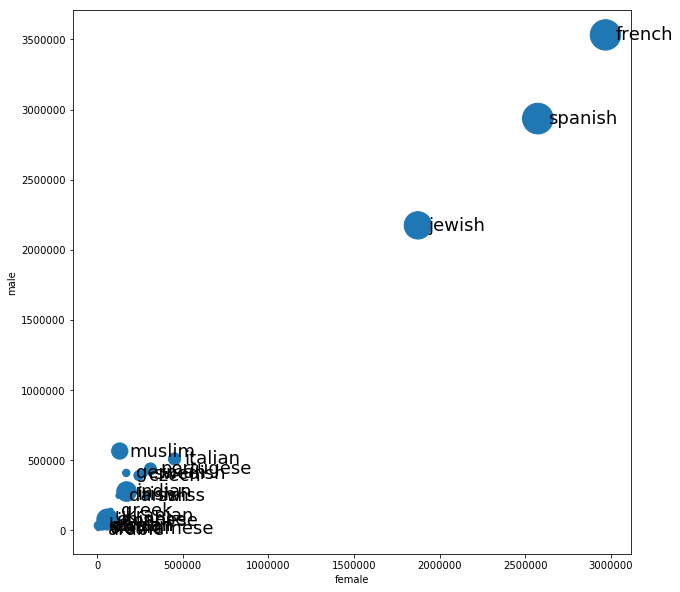

In [63]:
new_df = pd.DataFrame(columns=('unknown', 'female', 'male'))
for name, group in df.groupby(['ethnicity','gender']).size().reset_index().groupby('ethnicity'):
    marker = group[group['gender'] == 0][0].iloc[0]
    x_val = group[group['gender'] == 1][0].iloc[0]
    y_val = group[group['gender'] == 2][0].iloc[0]
    new_df.loc[name] = [marker, x_val, y_val]    
new_df.sort_values('male', ascending=False, inplace=True)

ax = new_df.plot('female', 'male', s=new_df['unknown'].astype(float)/2000, kind='scatter', figsize=(10,10))
for k, v in new_df.iterrows():
    ax.annotate(k, v[['female', 'male']],
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=18)
plt.show()

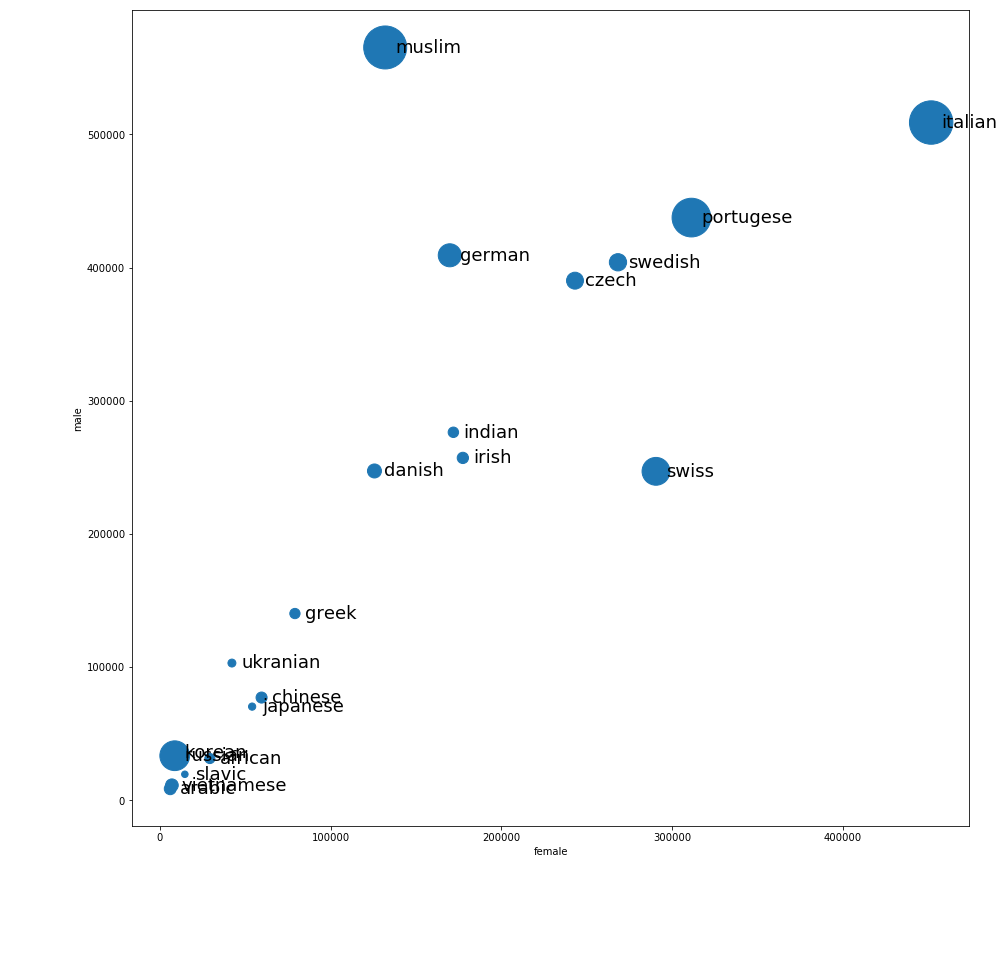

In [70]:
ax = new_df.iloc[3:, :].plot('female', 'male', s=new_df['unknown'].astype(float)/1000, kind='scatter', figsize=(15,15))

for k, v in new_df.iterrows():
    ax.annotate(k, v[['female', 'male']],
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=18)
plt.show()